In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:

# CSV dosyasını yükle
df = pd.read_csv('dengeli_ses_oznitelikleri_ve_etiketleri.csv')

# Girdi (X) ve çıktı (y) verilerini ayır
X = df.drop(['Dosya Adı', 'Etiket'], axis=1)
y = df['Etiket']

# Etiketleri sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Verileri ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verileri eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Modeli oluştur
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
92/92 - 1s - loss: 0.6549 - accuracy: 0.6347 - val_loss: 0.6605 - val_accuracy: 0.6243 - 1s/epoch - 11ms/step
Epoch 2/50
92/92 - 0s - loss: 0.5966 - accuracy: 0.6934 - val_loss: 0.6254 - val_accuracy: 0.6571 - 371ms/epoch - 4ms/step
Epoch 3/50
92/92 - 0s - loss: 0.5572 - accuracy: 0.7242 - val_loss: 0.6145 - val_accuracy: 0.6557 - 338ms/epoch - 4ms/step
Epoch 4/50
92/92 - 0s - loss: 0.5221 - accuracy: 0.7461 - val_loss: 0.6177 - val_accuracy: 0.6776 - 221ms/epoch - 2ms/step
Epoch 5/50
92/92 - 0s - loss: 0.4972 - accuracy: 0.7601 - val_loss: 0.5726 - val_accuracy: 0.7104 - 213ms/epoch - 2ms/step
Epoch 6/50
92/92 - 0s - loss: 0.4704 - accuracy: 0.7878 - val_loss: 0.5605 - val_accuracy: 0.7090 - 169ms/epoch - 2ms/step
Epoch 7/50
92/92 - 0s - loss: 0.4478 - accuracy: 0.7980 - val_loss: 0.5549 - val_accuracy: 0.7158 - 176ms/epoch - 2ms/step
Epoch 8/50
92/92 - 0s - loss: 0.4222 - accuracy: 0.8113 - val_loss: 0.5474 - val_accuracy: 0.7199 - 223ms/epoch - 2ms/step
Epoch 9/50
92/92 -

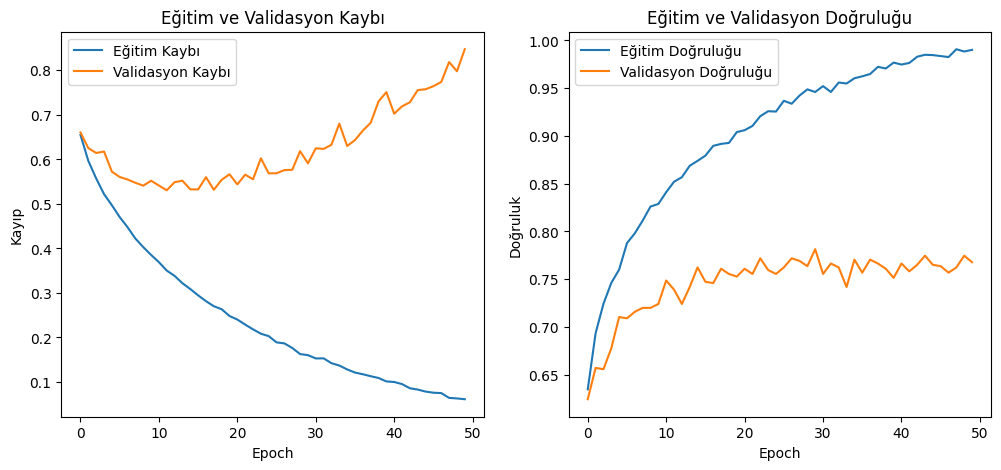

23/23 [==============================] - 0s 1ms/step


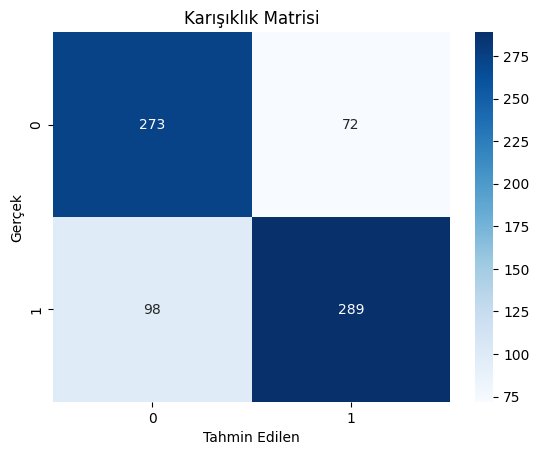

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Eğitim ve validasyon kaybını ve doğruluğunu görselleştir
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Validasyon Kaybı')
plt.title('Eğitim ve Validasyon Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validasyon Doğruluğu')
plt.title('Eğitim ve Validasyon Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Karışıklık matrisini hesapla ve görselleştir
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Model ağırlıklarını kaydet
model.save('Multilayer_Perceptron.h5')